# Credit Card Fraud Detection

In [92]:
# Import library
import pandas as pd

In [93]:
# reading the data
df = pd.read_csv("../data/creditcard.csv")
df.head() # to look at the first few rows of the dataframe

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [94]:
# for more information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

# Data

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the original features and more background information about the data can't be revealed. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# Look at the class labels

In [95]:
# Counting the number of non-fraud and fraud
occ = df['Class'].value_counts()
occ

0    284315
1       492
Name: Class, dtype: int64

In [96]:
# probability of non-fraud and fraud
prob = df['Class'].value_counts(1)
prob

0    0.998273
1    0.001727
Name: Class, dtype: float64

# Visualizing the data

(Text(0.5, 0, 'Class'), Text(0, 0.5, 'Frequency'))

c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


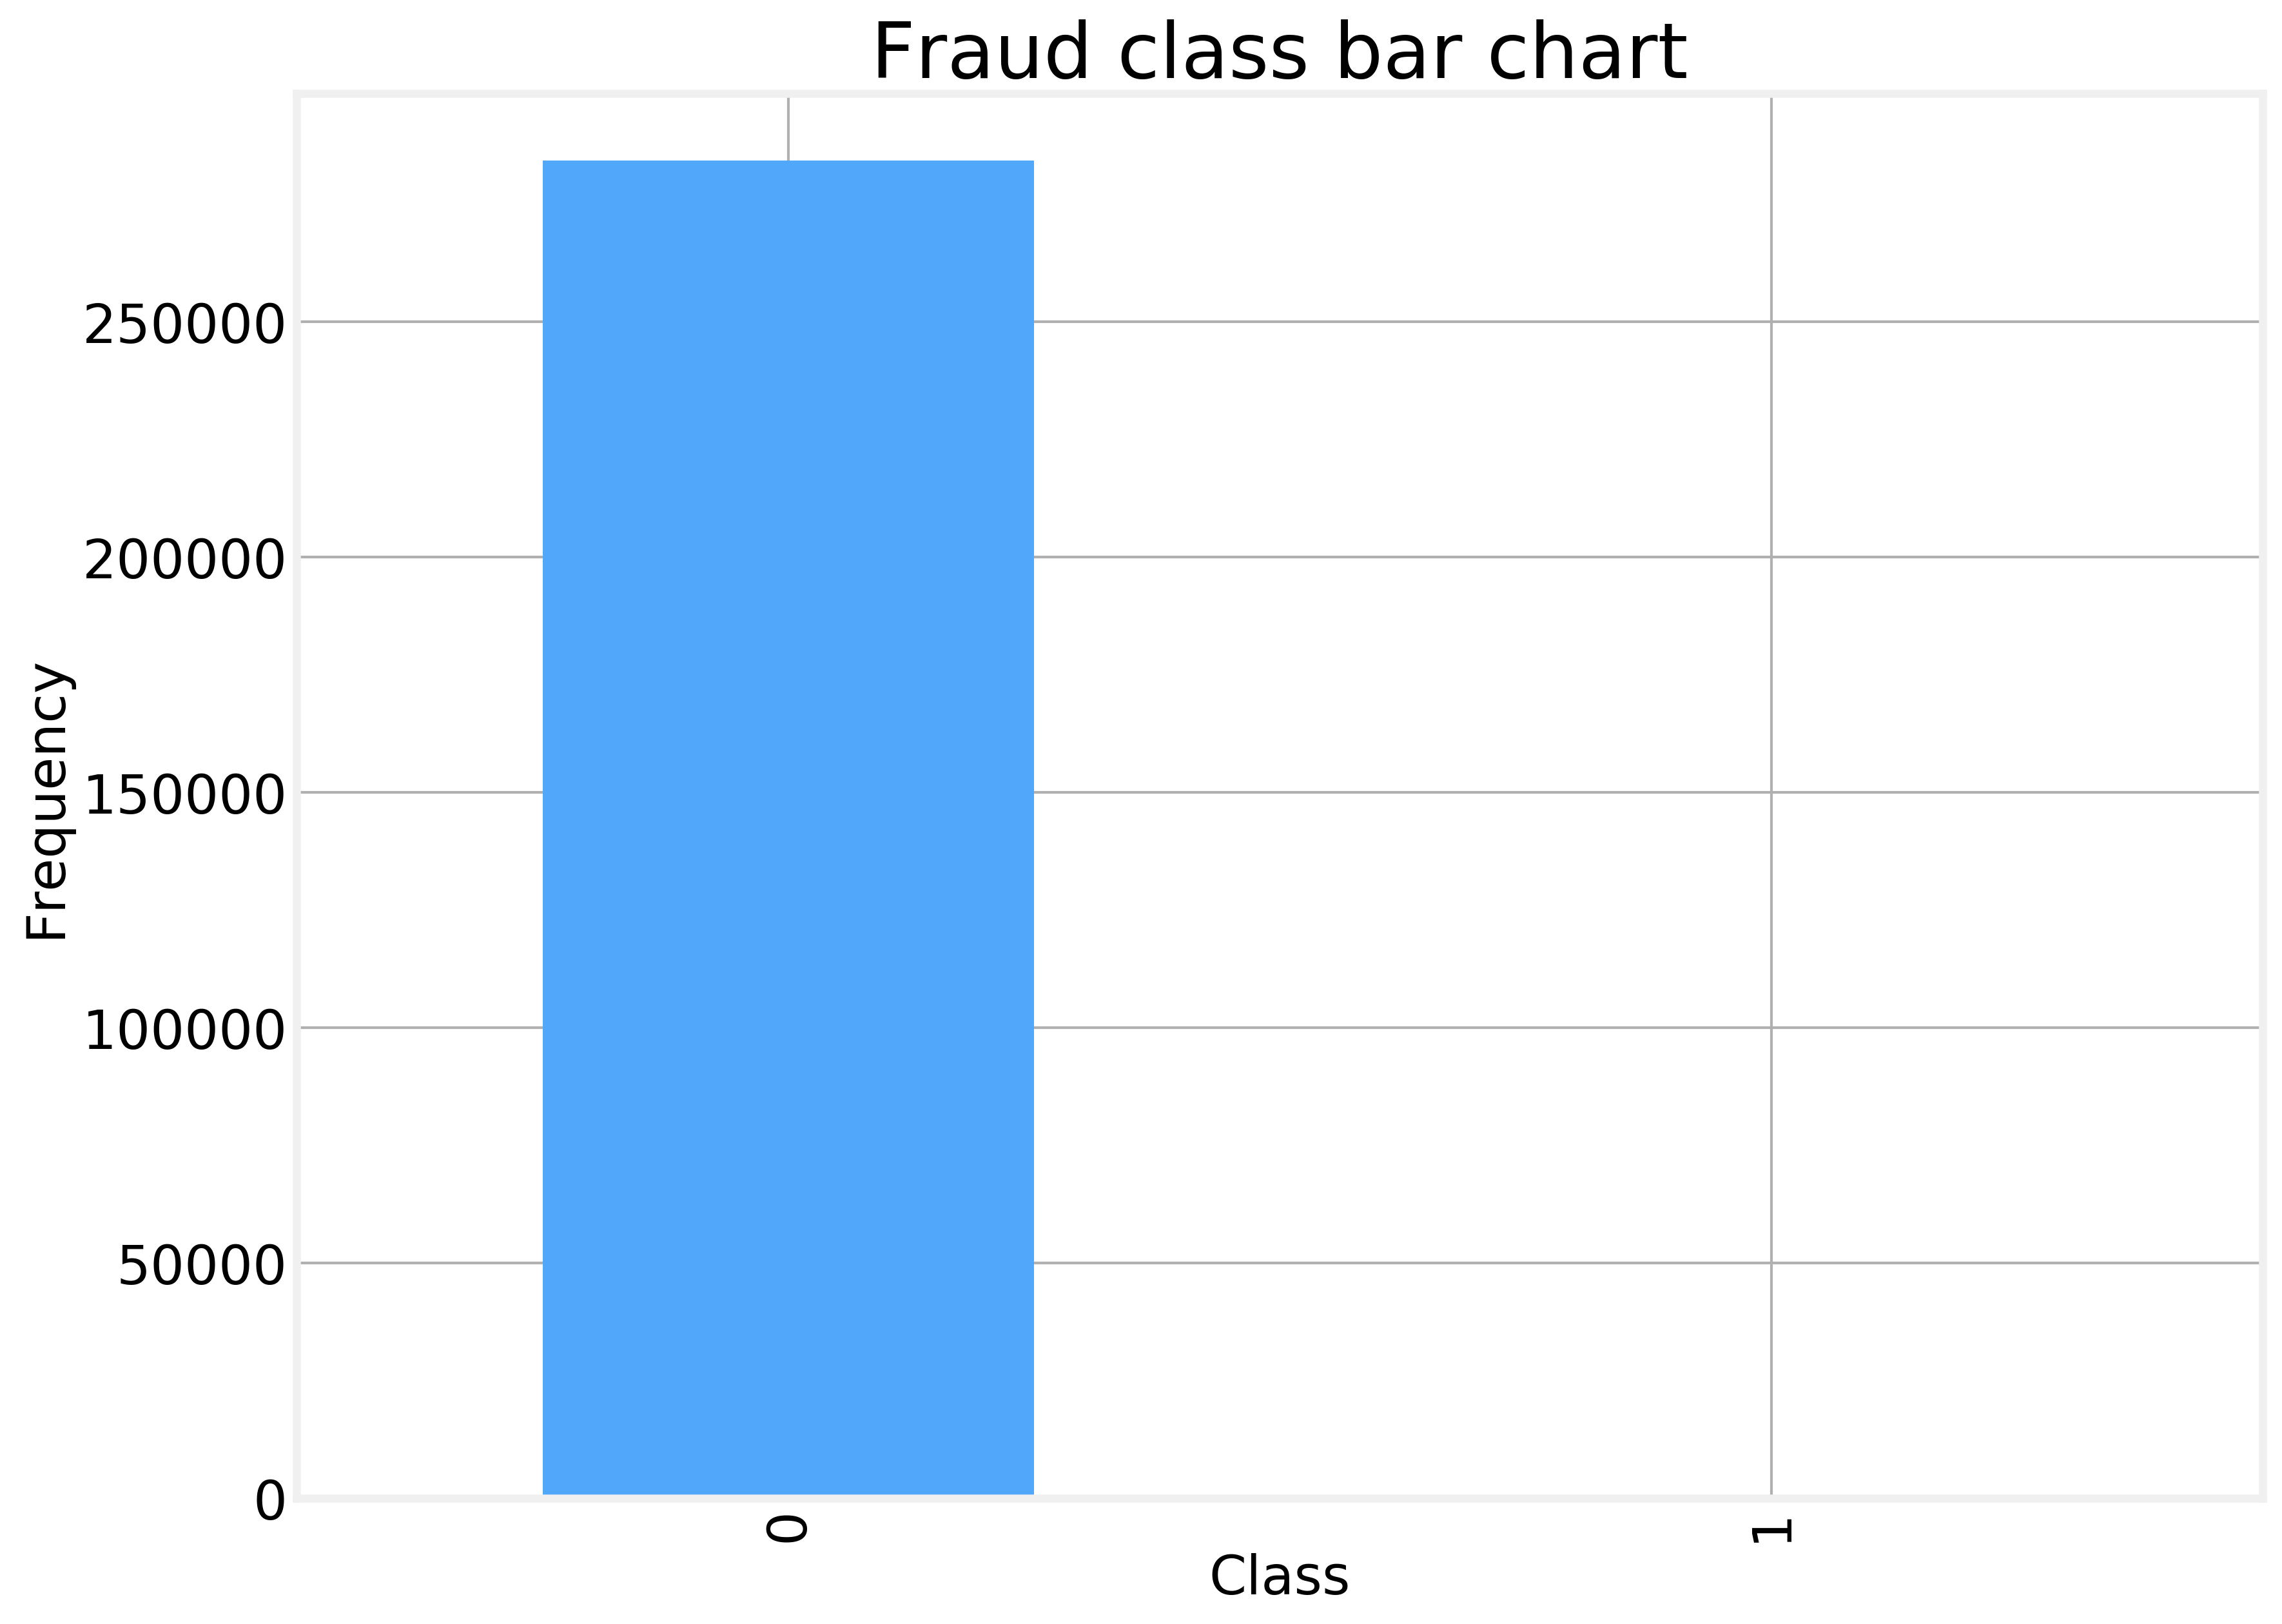

In [97]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('../OddExtension5.mplstyle') # using my style

count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')

plt.gca()
plt.title("Fraud class bar chart")
plt.xlabel("Class"),plt.ylabel("Frequency")

In [98]:
def prep_data(df):
    """
    Prepare the data to train the model
    args: df - dataframe
    returns: X - array of columns, Y - class array to be predicted
    """
    
    X = df.iloc[:, 1:29]
    X = np.array(X).astype(np.float64) # converting the values to float
    Y = df.iloc[:, 30]
    Y = np.array(Y).astype(np.float64) # target variable - class
    
    return X,Y

In [99]:
def plot_data(X,Y):
    plt.scatter(X[Y == 0,0], X[Y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.5, c='g')
    plt.scatter(X[Y == 1,0], X[Y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.5, c='r')
    plt.legend()
    
    return plt.show()

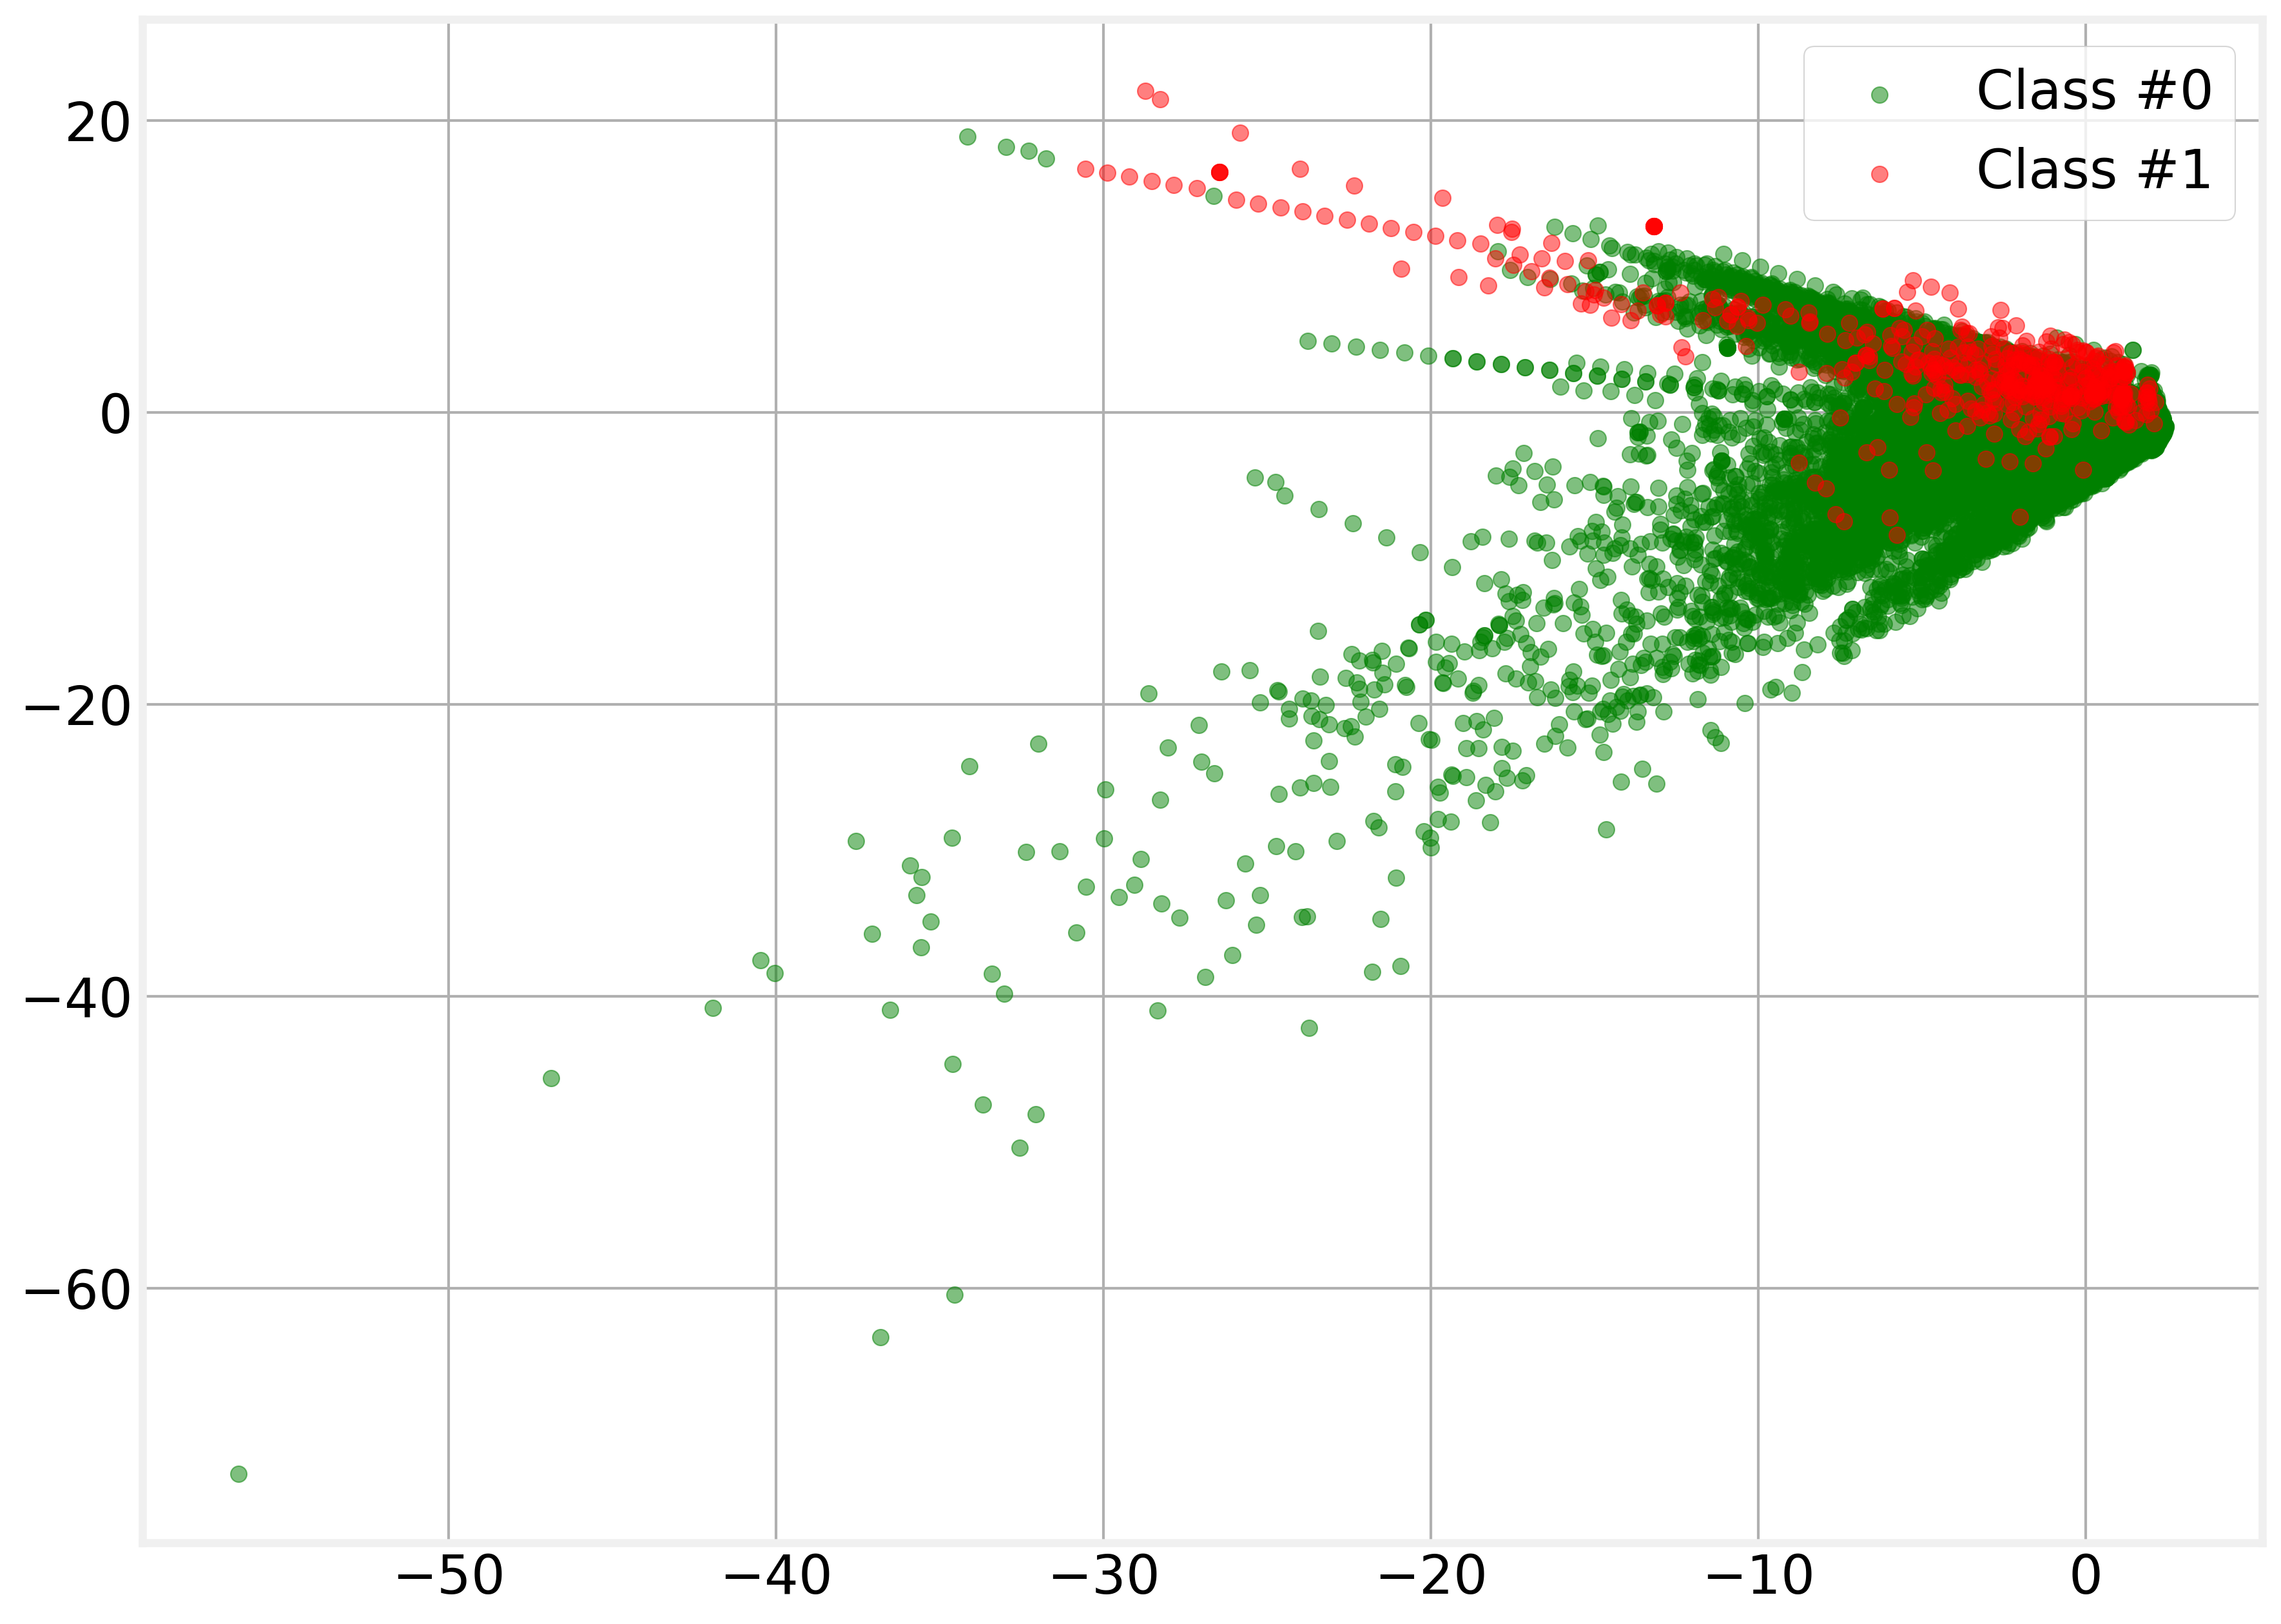

In [100]:
# Create X and Y from the prep_data function
X, Y = prep_data(df)

# Plot the data
plot_data(X,Y)

# Manage Imbalanced Data

Different methods which can help us to deal with imbalanced data. There are various resampling techniques to handle imbalanced data:

  + ```Random Under Sampling (RUS)```: This reduces the majority classes and makes the data balanced.
  + ```Random Over Sampling (ROS)```: This generated duplicates of the minority class. Inefficient because of duplicacy.
  + ```Synthetic Minority Oversampling Technique (SMOTE)```: Generates fake realistic data to balance out the data.

c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


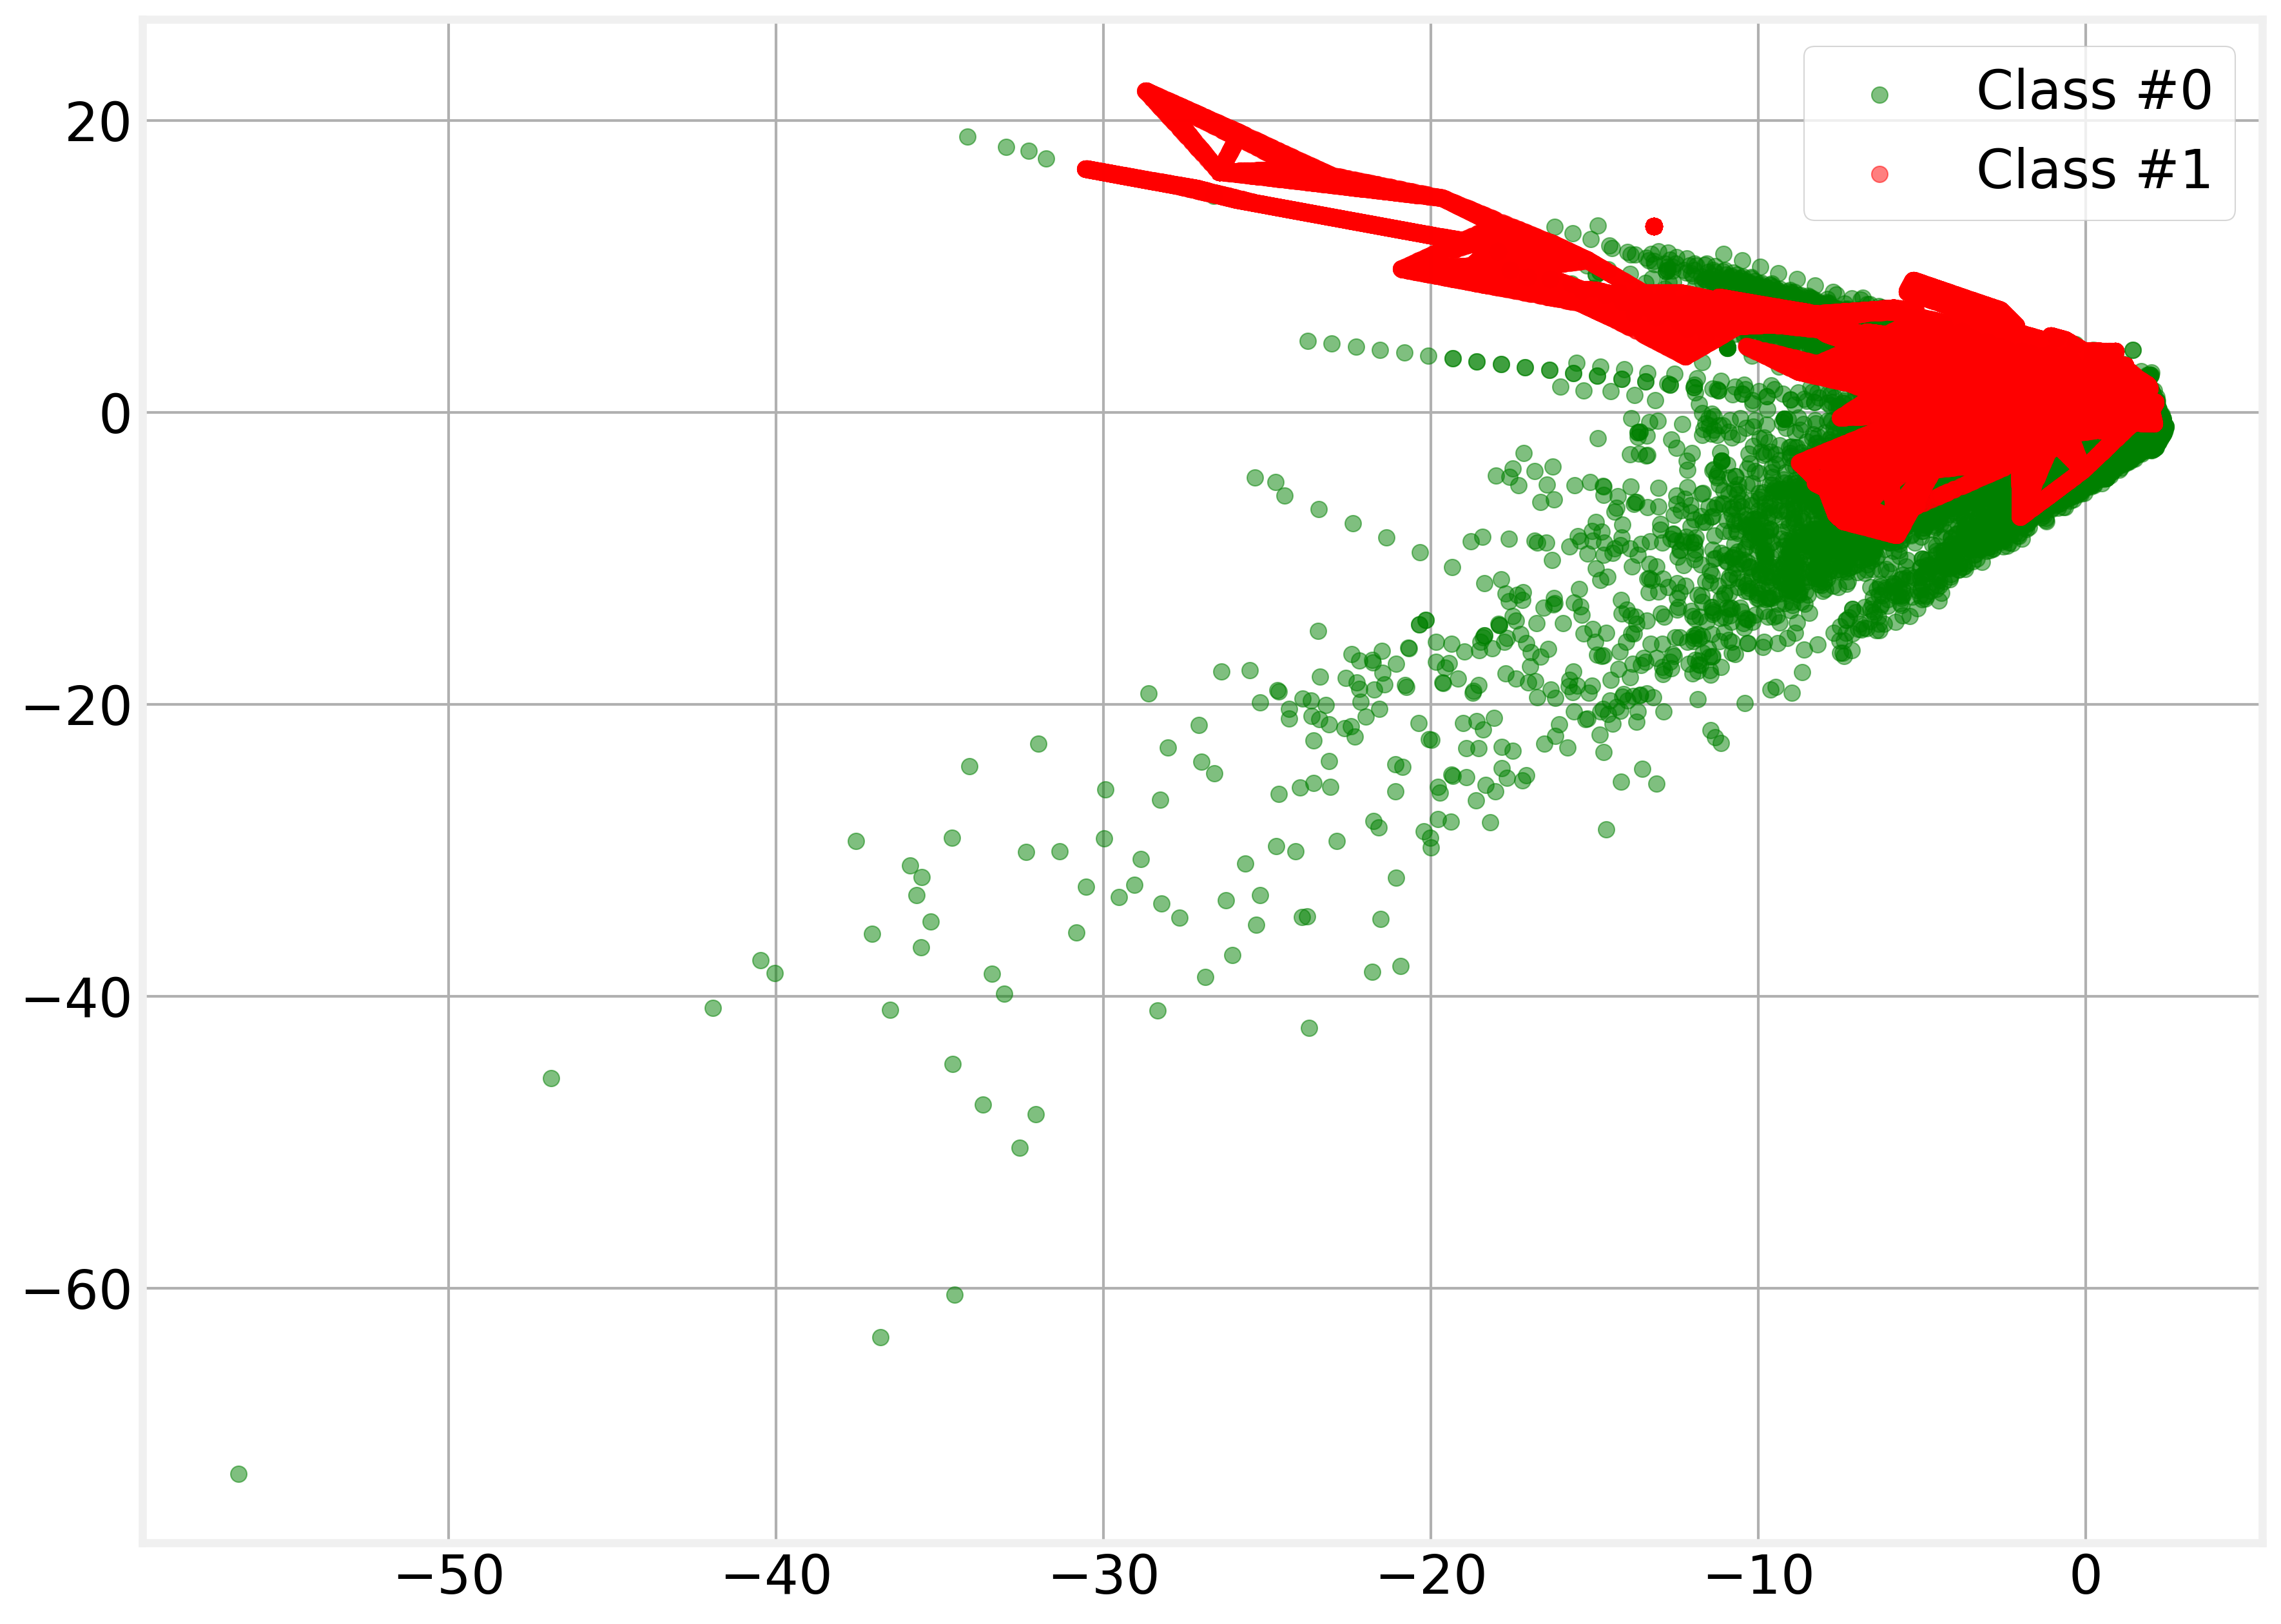

In [101]:
# SMOTE in use
from imblearn.over_sampling import SMOTE

X,Y = prep_data(df) # preparing the data

method = SMOTE() # invoking the resampling method

X_resampled, Y_resampled = method.fit_sample(X,Y) # creating the resampled feature set

plot_data(X_resampled, Y_resampled)

In [102]:
def compare_plot(X,Y,X_resampled,Y_resampled, method):
    # Start a plot figure
    f, (ax1, ax2) = plt.subplots(1,2)
    
    # sub-plot number 1, this is our normal data
    c0 = ax1.scatter(X[Y == 0,0], X[Y == 0,1], label="Class #0", alpha=0.5, c='g')
    c1 = ax1.scatter(X[Y == 1,0], X[Y == 1,1], label="Class #1", alpha=0.5, c='r')
    ax1.set_title('Original set')
    
    # sub-plot number 2, this is our oversampled data
    ax2.scatter(X_resampled[Y_resampled == 0,0], X_resampled[Y_resampled == 0,1], label="Class #0", alpha=0.5, c='g')
    ax2.scatter(X_resampled[Y_resampled == 1,0], X_resampled[Y_resampled == 1,1], label="Class #1", alpha=0.5, c='r')
    ax2.set_title(method)
    
    # some settings and ready to go
    plt.figlegend((c0,c1), ('Class #0', 'Class #1'), loc='lower center', ncol=2, labelspacing=0.1)
    plt.tight_layout(pad=2)
    
    return plt.show()

0.0    284315
1.0       492
dtype: int64


1.0    284315
0.0    284315
dtype: int64


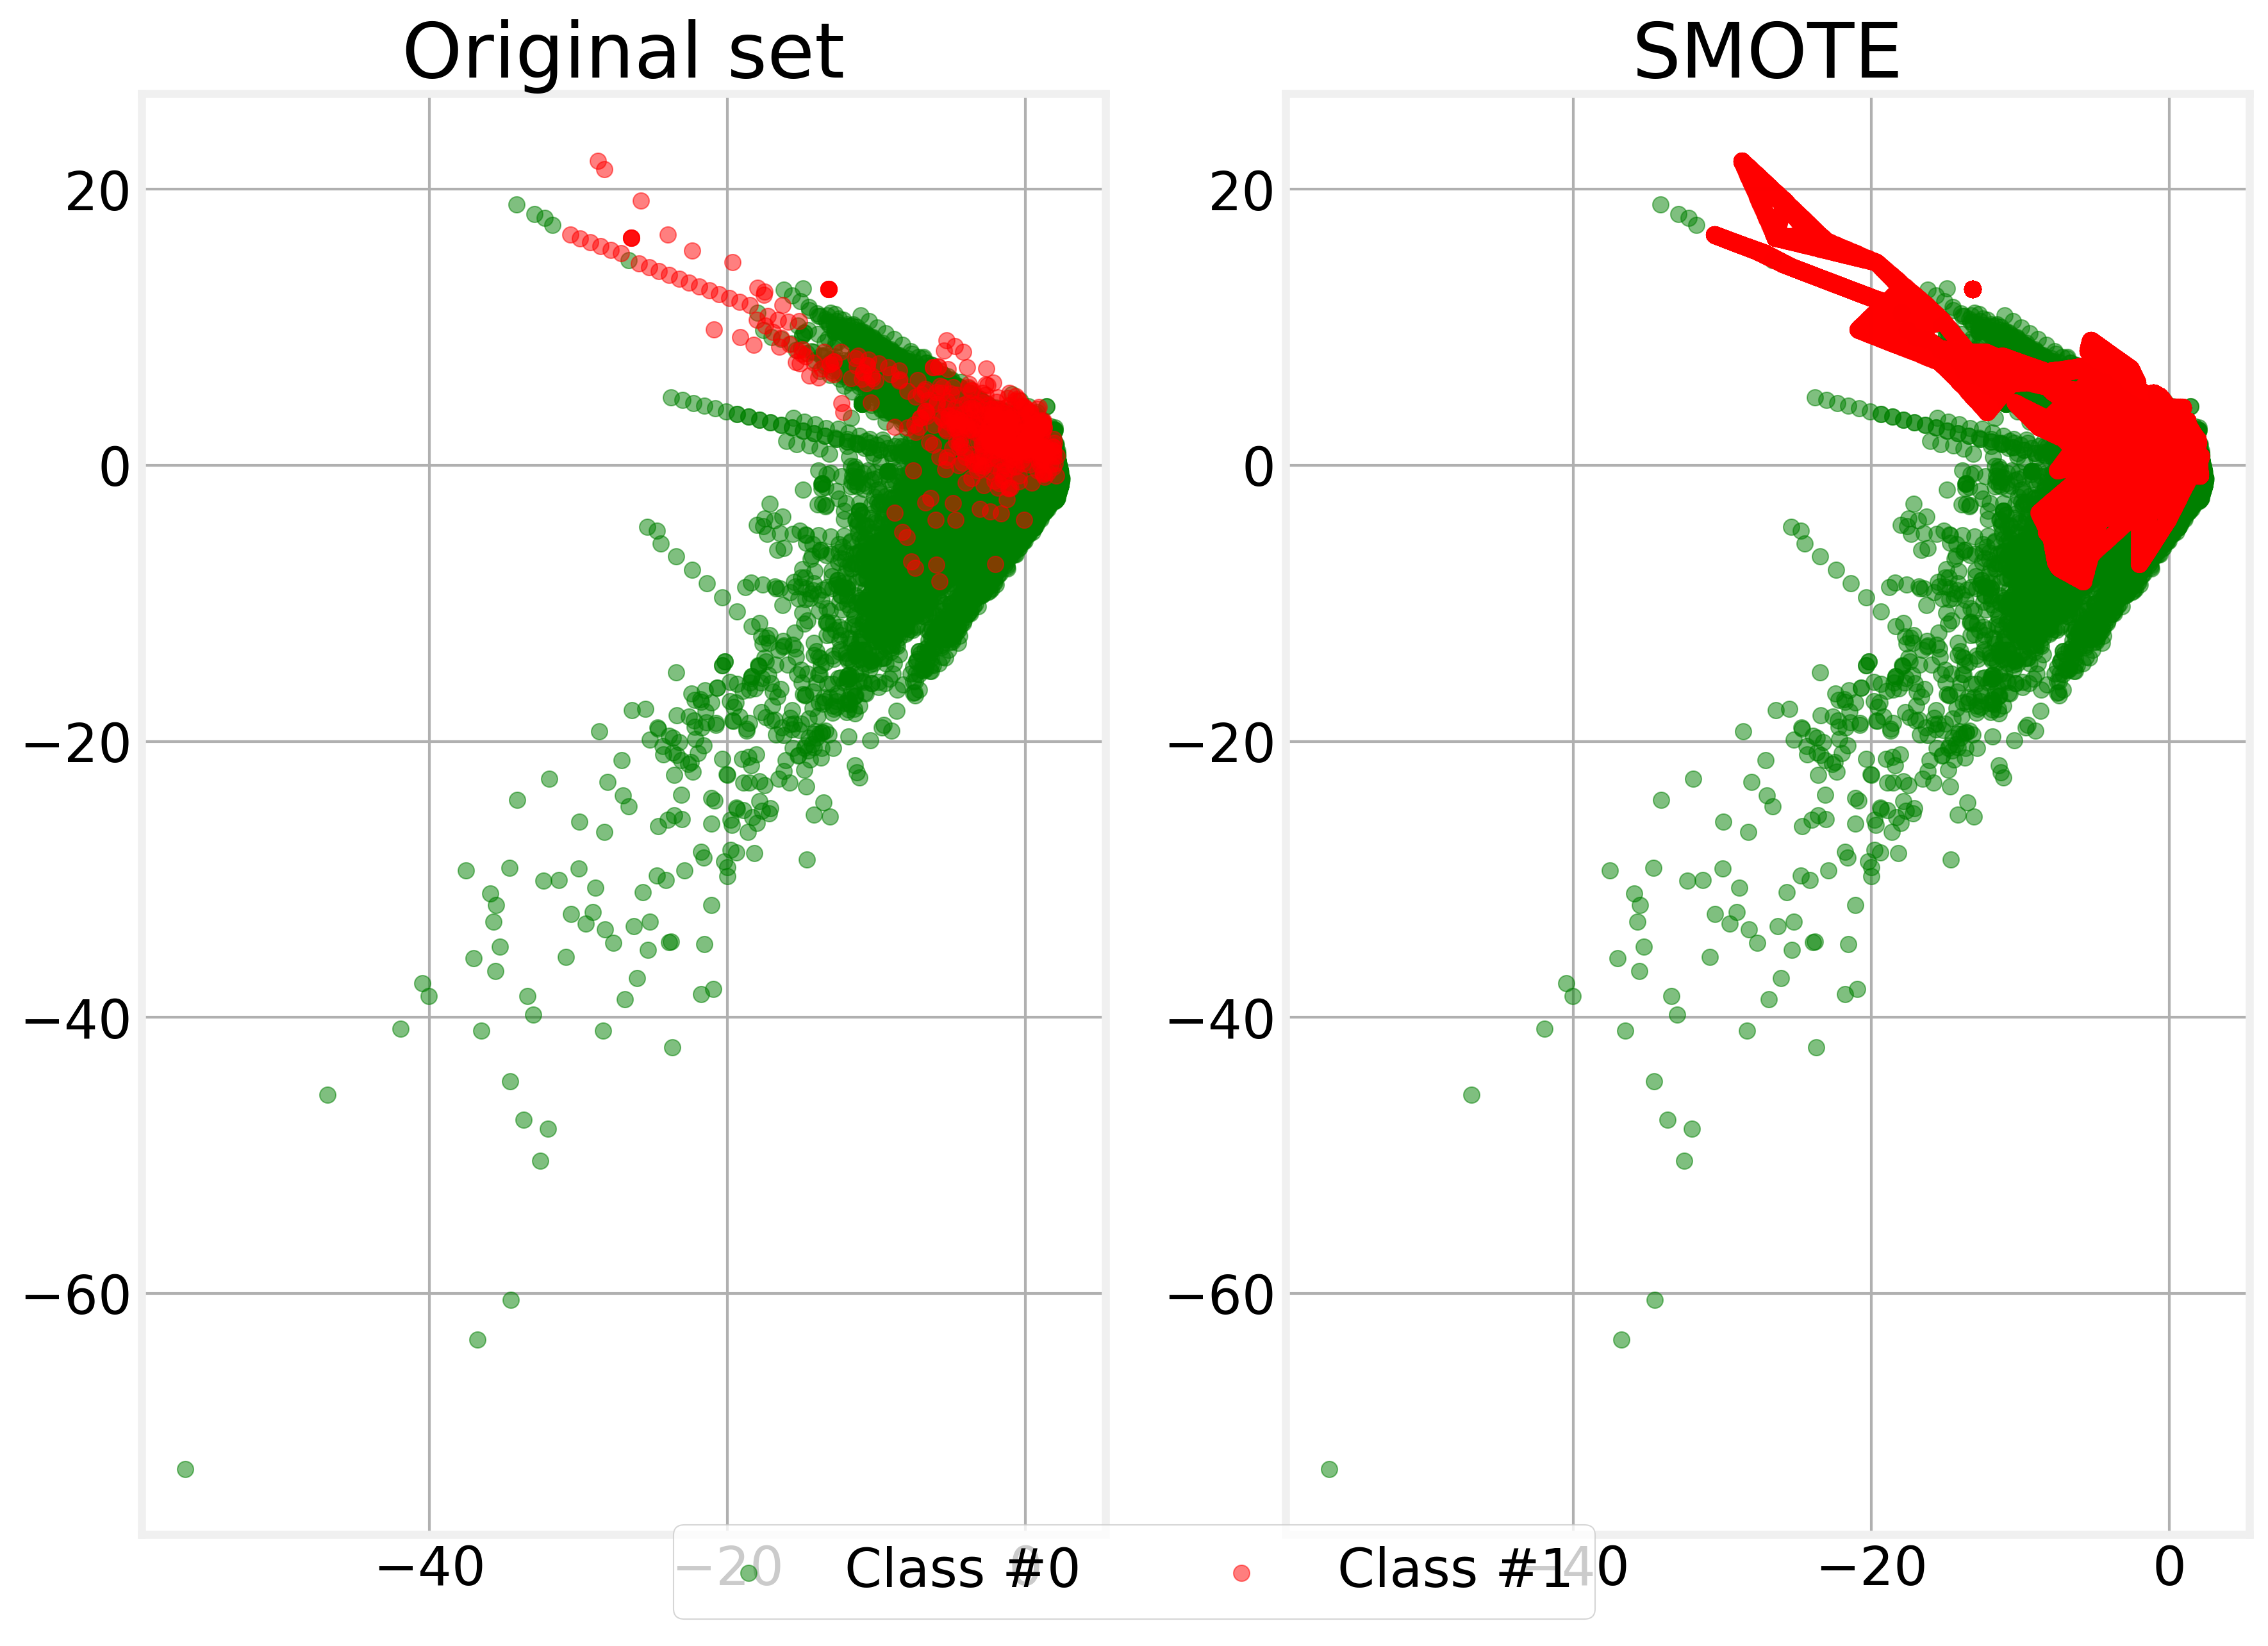

In [103]:
# print the values_counts on the original labels y
print(pd.value_counts(pd.Series(Y)))

print("\n")

# Print the values counts
print(pd.value_counts(pd.Series(Y_resampled)))

# Run the compare plot
compare_plot(X,Y,X_resampled,Y_resampled, method='SMOTE')

# Rule-based method to detect fraudsters

This is the "old way" of finding fraud cases. In this a threshold values is set using common statistics, to split fraud and non-fraud. Then, use those thresholds on your features to detect fraud.

Statistics thresholds are often determined by looking at the mean values of observations. Then, use that information to create common sense thresholdss.

In [104]:
# Split the dataframe by class then apply mean
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [105]:
# Implement a rule for stating which cases are flagged as fraud
df['flag_as_fraud'] = np.where(np.logical_and(df['V1'] < -3, df['V3'] < -5), 1, 0)

# Create a crosstab of flagged fraud cases versus the actual fraud cases
pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud'])


Flagged Fraud,0,1
Actual Fraud,,
0,283089,1226
1,322,170


With this rule, we detect 170 out of 492 fraud cases, but can't detect other 322, and get 1226 false positives

# Now, using ML classification to catch fraudsters

In [106]:
# Importing sklearn for training splitting and importing the classifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [107]:
# create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Fit a logistic regression model to our data
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtain model prediction
predicted = model.predict(X_test)

target_names = ['class #0', 'class #1']

# Print the classification report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted,target_names=target_names ))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

    class #0       1.00      1.00      1.00     85296
    class #1       0.89      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.95      0.81      0.87     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85285    11]
 [   56    91]]


We are getting much less false positives(FP), so that's an improvement. Also, we're catching higher percentage of fraud cases, so that is also better than before.

# Logistic Regression combined with SMOTE

Combining Logistics Regression model with a SMOTE resampling method

In [108]:
# This is the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import BorderlineSMOTE

# Define which resampling method and which ML model to use in the pipeline
resampling = BorderlineSMOTE(kind='borderline-2') # instead SMOTE(kind='borderline2')90
model = LogisticRegression()

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

In [109]:
# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=.3, random_state=0)

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     85296
         1.0       0.09      0.87      0.16       147

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.58     85443
weighted avg       1.00      0.98      0.99     85443

Confusion matrix:
 [[83962  1334]
 [   19   128]]


Whoops! the SMOTE hasn't helped but has added more false positives in our results. We have a very high number of false positives. 
So, from these we can say that not in all cases does resampling necessarily lead to better results.

When the fraud cases are very spread and scattered over the data, using SMOTE can introduce a bit of bias.

# Fraud Detection using labelled data

Now, I'll use classifiers, adjust them and compare them to find the most efficient fraud detection model.

## Natural hit rate

In [110]:
# Count the total number of observations form the length of Y
obs = np.bincount(Y.astype('int'))
total_obs = obs.sum()

# Count the total number of non-fraudlent observations
non_fraud = obs[0] 

# Calculate the percentage of non_fraud observations in the dataset
percentage  = (float(non_fraud)/float(total_obs))* 100

# Print the percentage: this is our "natural accuracy" by doing nothing
print(percentage)

99.82725143693798


# 1. Random forest classifier



In [111]:
# Import the random forest model from sklearn
from sklearn.ensemble import RandomForestClassifier

# Split your data into training and test
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

# Define the model as the random forest
model = RandomForestClassifier(random_state=1)

In [112]:
X_test.shape, y_test.shape

((85443, 28), (85443,))

In [113]:
# Fit the model to your training set
model.fit(X_train, y_train)

# Obtain predictions from the test data
predicted = model.predict(X_test)

In [114]:
from sklearn.metrics import accuracy_score

# Print the accuracy performance matrix
print(accuracy_score(y_test, predicted))

0.9995084442259752


# Performance metrics for the RF model

With highly imbalanced fraud data, the AUCROC curve is a more reliable performance metric, used to compare different classifiers. Moreover, the classification report tells you about the precision and recall of your model, whilst the confusion matrix actually shows how many faud cases you can predict correctly.

In [115]:
# Import the packages to get the different performance metrics
from sklearn.metrics import  classification_report, confusion_matrix, roc_auc_score

# obtain the predictions from our random forest model
predicted = model.predict(X_test)

# Predict probabilities
probs = model.predict_proba(X_test)

# Print the AUCROC curve, classification report and confusion matrix
print(classification_report(y_test, predicted, target_names=['class #0', 'class #1']))

print(confusion_matrix(y_test, predicted, labels=[0,1]))

print("\n")

print("AUCROC score: ", roc_auc_score(y_test, probs[:,1]))

              precision    recall  f1-score   support

    class #0       1.00      1.00      1.00     85296
    class #1       0.94      0.76      0.84       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

[[85289     7]
 [   35   112]]


AUCROC score:  0.9440665287874669


# Plotting the Precision Recall Curve

In this curve Precision and Recall are inversely related; as Precision increases. Recall fails and vice-versa

In [116]:
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision,step='post', alpha=0.2, color='b')
    plt.xlabel("Recall")
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    
    return plt.show()

c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


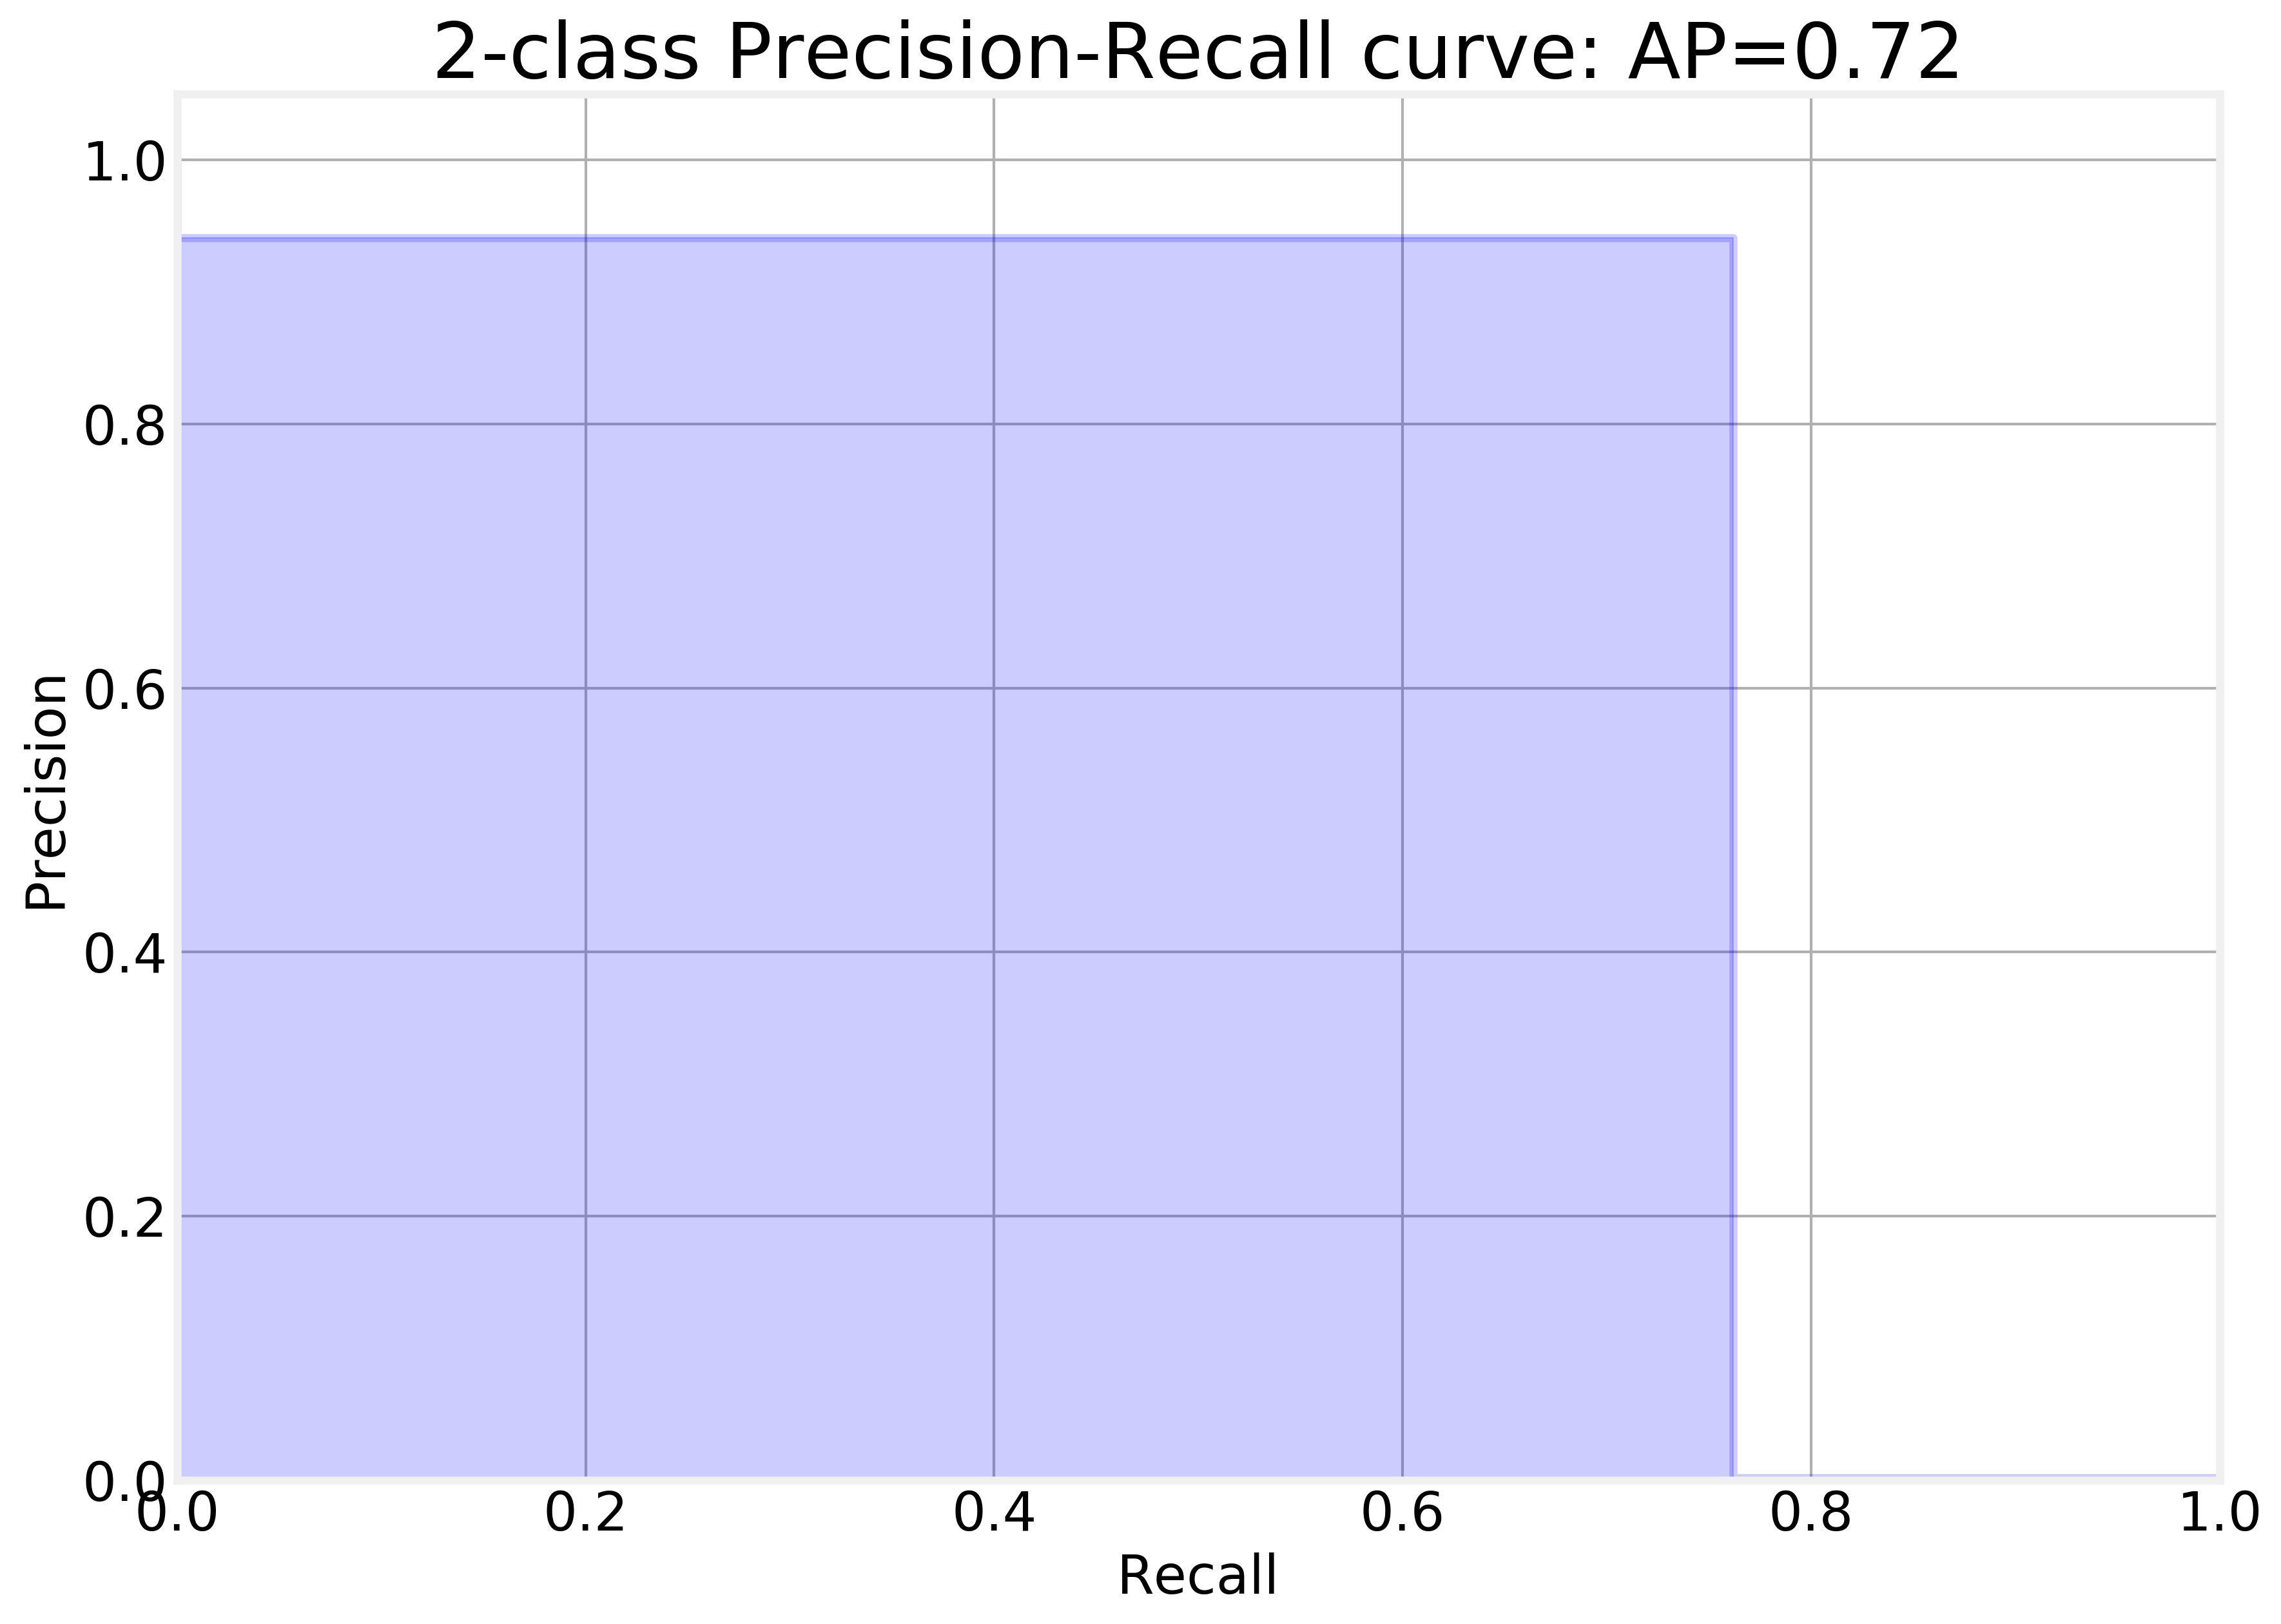

In [117]:
from sklearn.metrics import average_precision_score, precision_recall_curve, roc_curve

# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)

# Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, predicted)

# Plot the recall prcision tradeoff
plot_pr_curve(recall, precision, average_precision)

In [118]:
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, predicted)
false_positive_rate, true_positive_rate, threshold

(array([0.00000000e+00, 8.20671544e-05, 1.00000000e+00]),
 array([0.        , 0.76190476, 1.        ]),
 array([2., 1., 0.]))

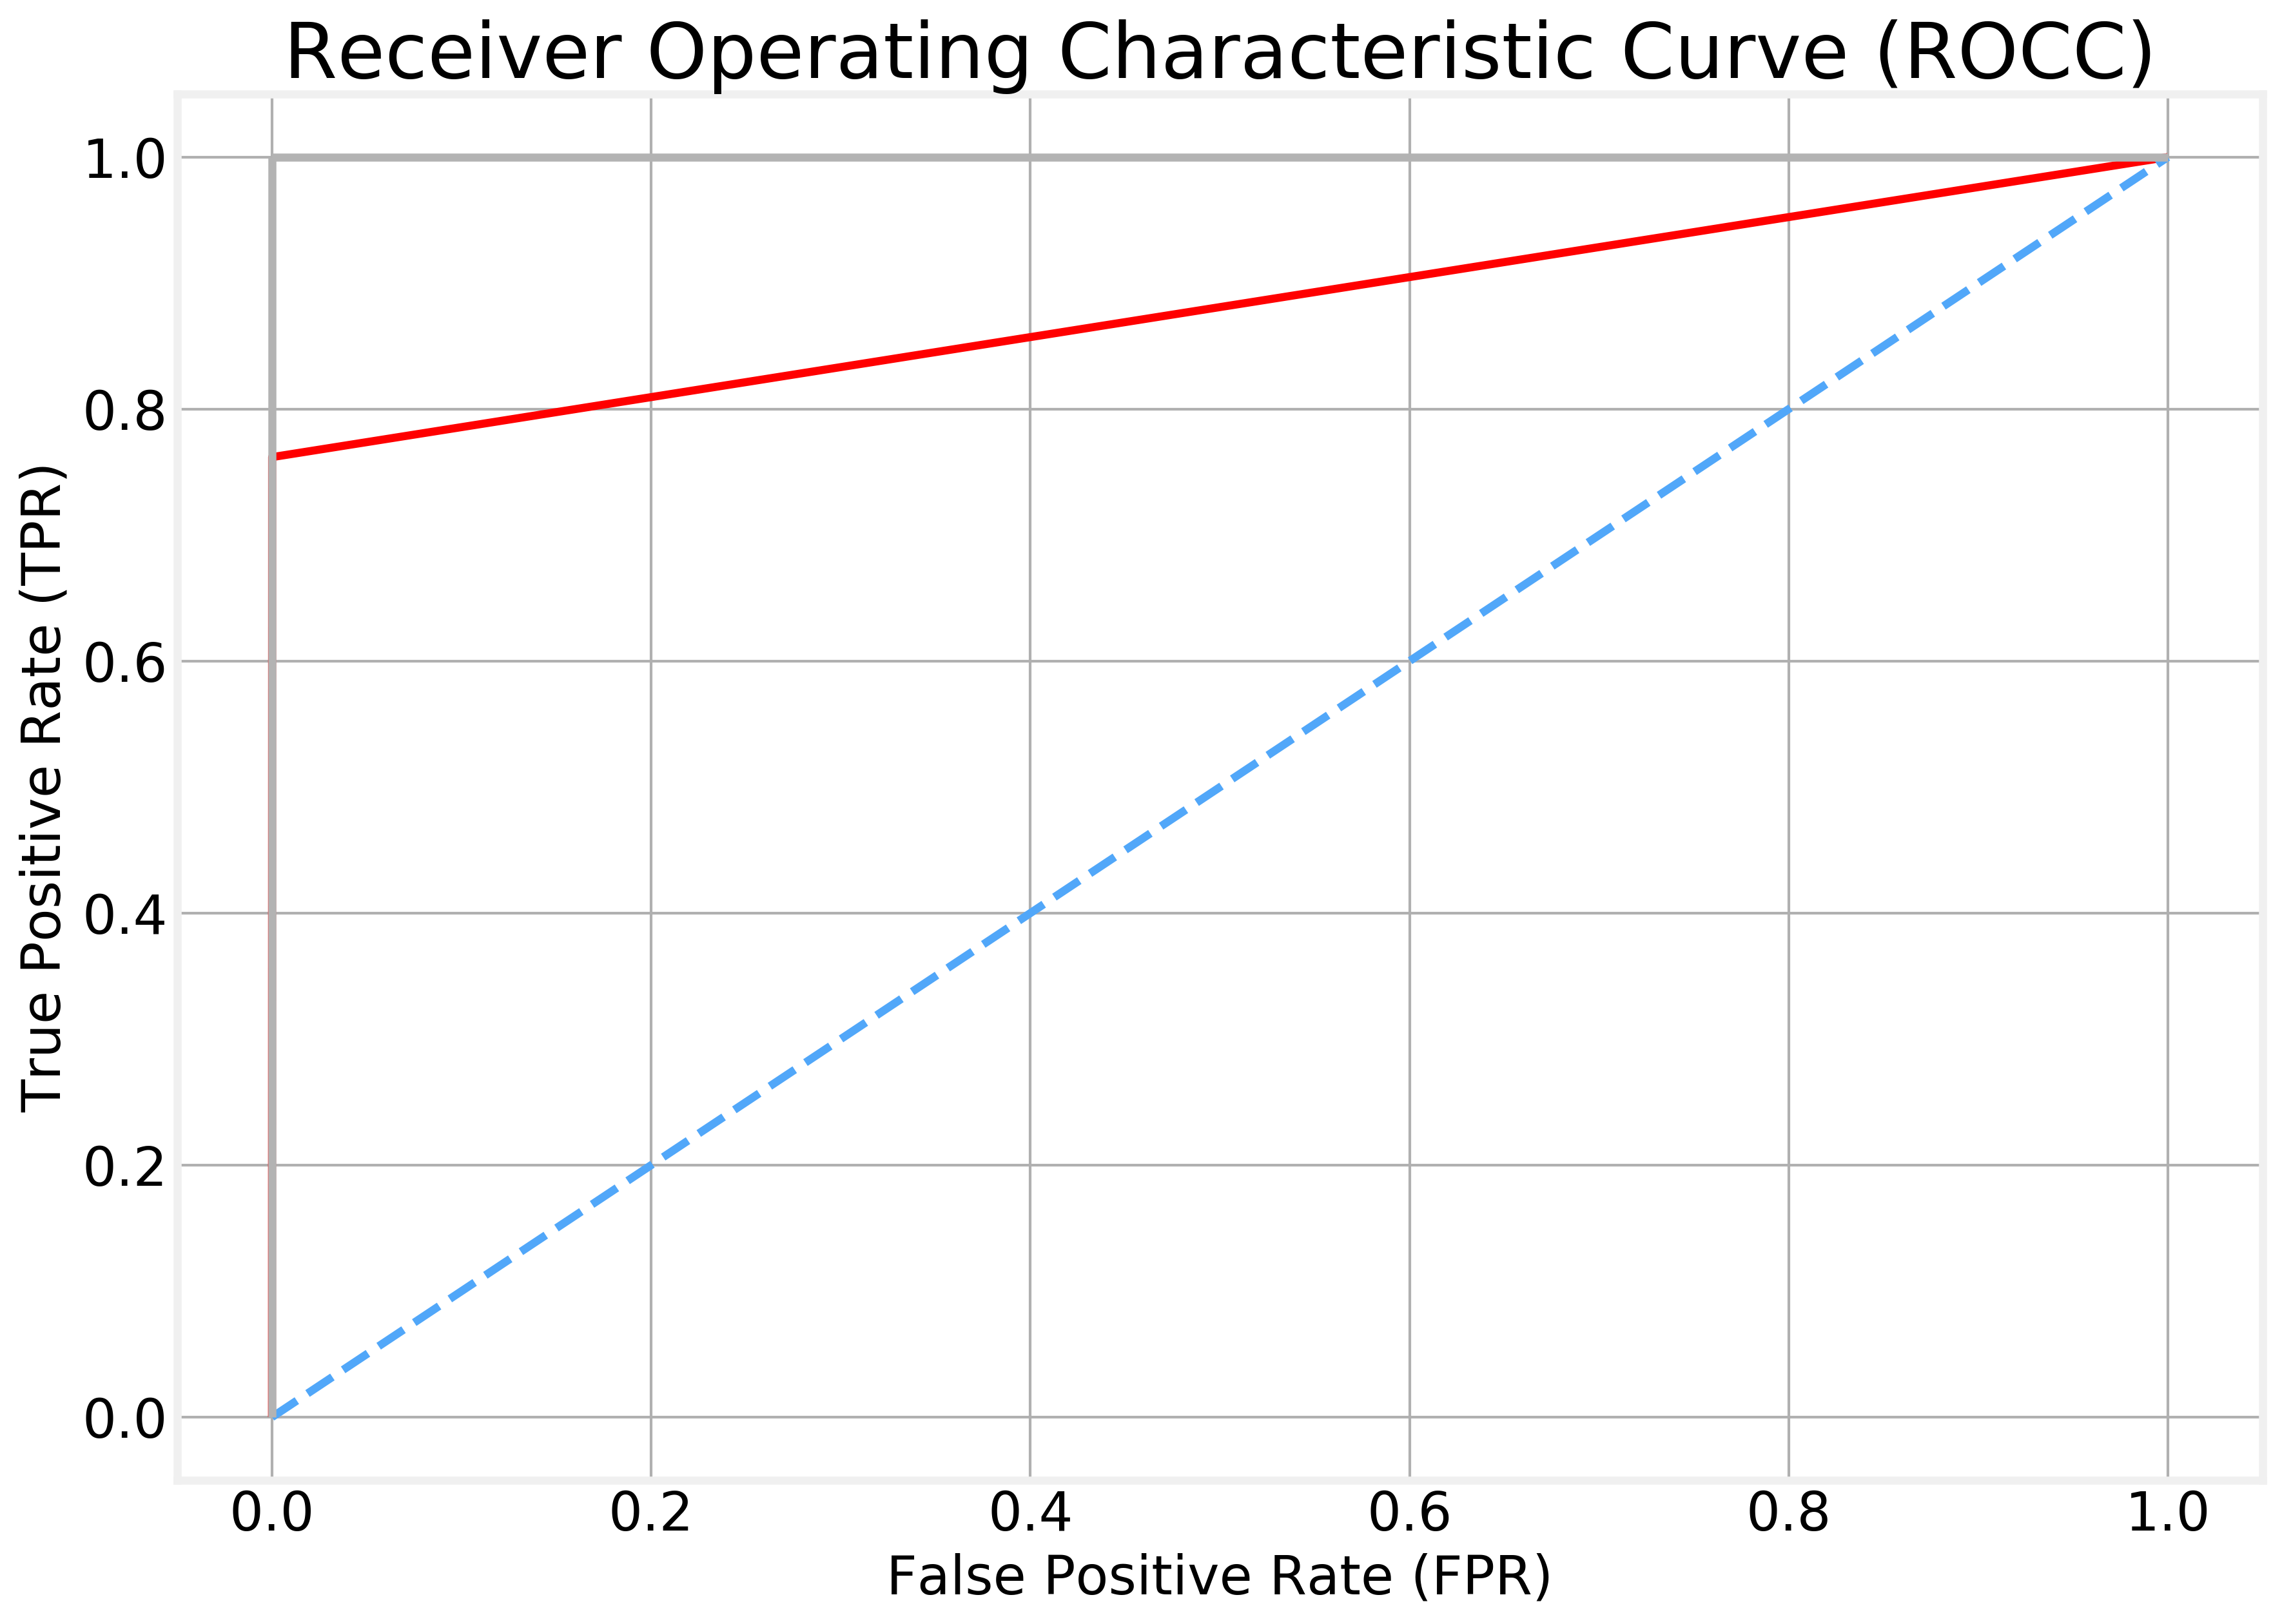

In [119]:
# Plot ROC Curve
plt.title("Receiver Operating Characteristic Curve (ROCC)")
plt.plot(false_positive_rate, true_positive_rate, c='r')
plt.plot([0,1], ls='--')
plt.plot([0,0], [1,0], c=".7")
plt.plot([1,1], c=".7")
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.show()

In [120]:
# Define the model with balanced subsample
model = RandomForestClassifier(class_weight='balanced_subsample', n_estimators=100, random_state=5)

# Fit your training model to your training set
model.fit(X_train, y_train)

# Obtain the predicted values and probabilities form the model
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

# Print the roc_auc_score, the classfication report and confusion matrix
print(roc_auc_score(y_test, probs[:,1]))
print(classification_report(y_test, predicted, target_names=['class #0', 'class #1']))
print(confusion_matrix(y_test, predicted))

0.9442655157166974
              precision    recall  f1-score   support

    class #0       1.00      1.00      1.00     85296
    class #1       0.96      0.74      0.84       147

    accuracy                           1.00     85443
   macro avg       0.98      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443

[[85292     4]
 [   38   109]]
